c:\Users\rebika\Desktop\fraud-detection-project\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [06:06:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


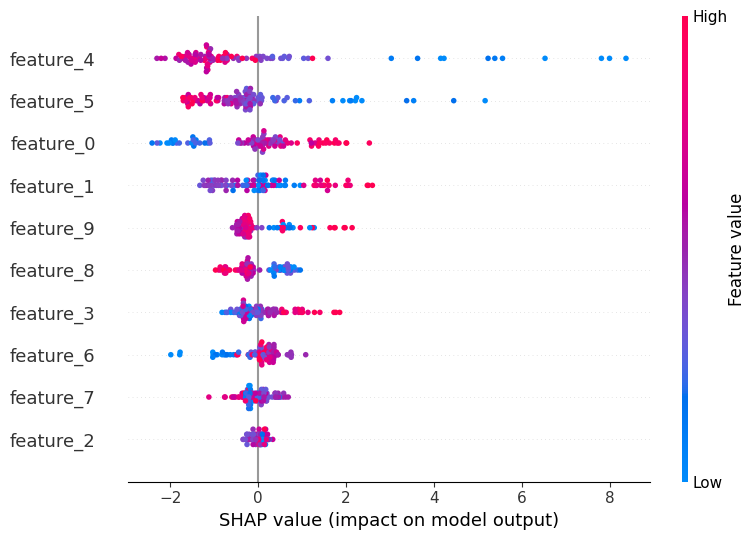

In [3]:
import shap
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# 1. Generate sample fraud-like data (replace with your actual data)
X_fraud, y_fraud = make_classification(n_samples=1000, n_features=10,
                                       n_informative=5, n_redundant=2,
                                       weights=[0.9, 0.1], random_state=42)

# Convert to DataFrame for better compatibility with SHAP
X_fraud = pd.DataFrame(X_fraud, columns=[f"feature_{i}" for i in range(10)])
y_fraud = pd.Series(y_fraud)

# 2. Train-test split
Xf_train, Xf_test, yf_train, yf_test = train_test_split(X_fraud, y_fraud, test_size=0.2, random_state=42)

# 3. Train XGBoost model
xgb_fraud = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_fraud.fit(Xf_train, yf_train)

# 4. Sample subset for SHAP
sampled_X = Xf_test.sample(100, random_state=42)

# 5. Create SHAP explainer
explainer = shap.Explainer(xgb_fraud, Xf_train)

# 6. Compute SHAP values
shap_values = explainer(sampled_X)

# 7. Visualize (optional)
shap.summary_plot(shap_values, sampled_X)


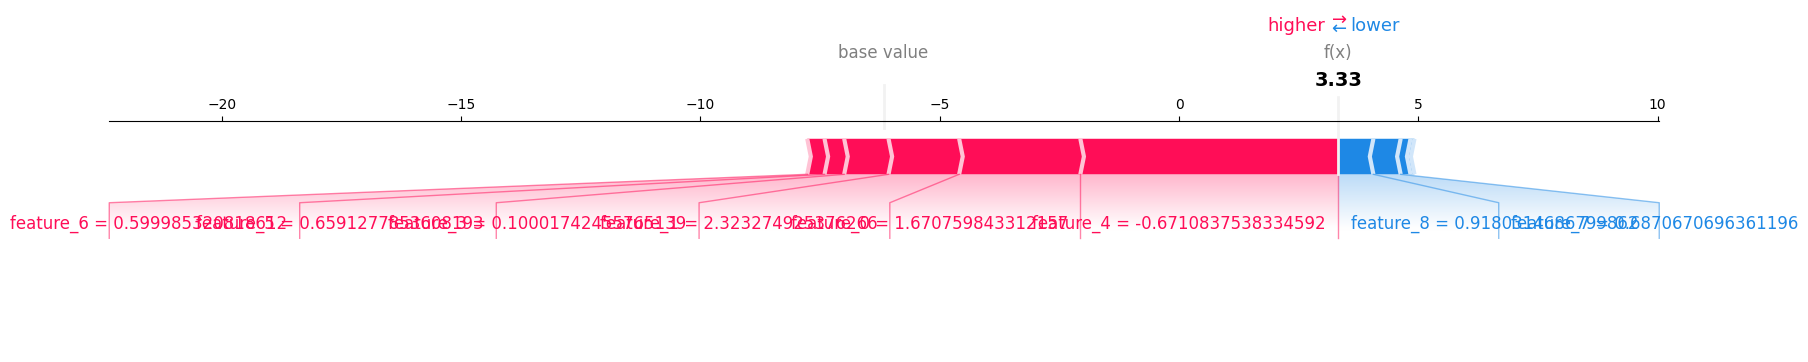

In [5]:
# Select a specific instance (e.g., index 10)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[10].values, sampled_X.iloc[10], matplotlib=True)


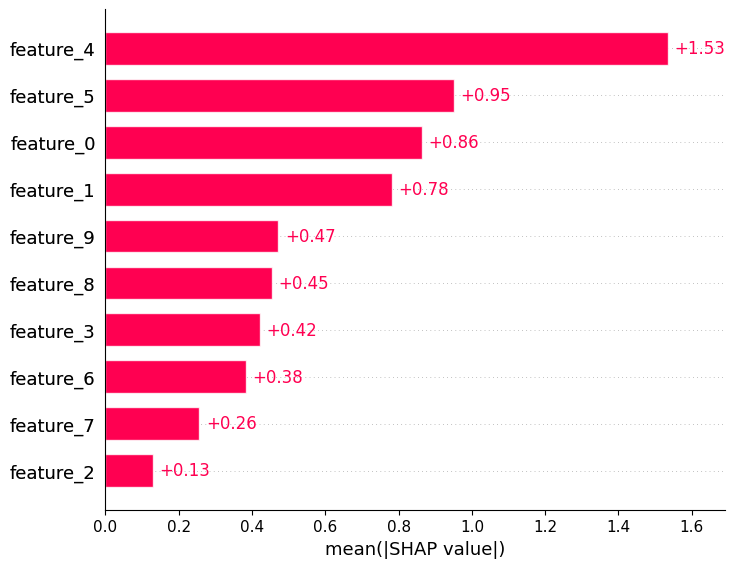

In [6]:
shap.plots.bar(shap_values)


In [9]:
import shap
import matplotlib.pyplot as plt
import os
os.makedirs("outputs", exist_ok=True)
shap.summary_plot(shap_values, sampled_X, show=False)
plt.savefig("outputs/shap_summary.png", bbox_inches='tight')
plt.close()

force_plot = shap.force_plot(explainer.expected_value, shap_values[10].values, sampled_X.iloc[10])
shap.save_html("outputs/shap_force.html", force_plot)
